In [1]:
from lender_main import *

In [2]:
from fulldata_pipeline_0811 import *

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
%load_ext autoreload
%autoreload 2
pd.options.display.max_rows = 999

In [4]:
df = read_full_data()

In [5]:
df.shape

(2945384, 105)

In [6]:
df = create_lenders_labels(df)

In [7]:
df.shape

(2945384, 109)

In [8]:
normal = df[~df['dollar_outliers?']][~df['team_outliers?']][~df['comments_outliers?']][~df['dollar_zeros?']]

In [9]:
normal.shape

(1017355, 109)

In [10]:
from model import *

In [11]:
ndf, X = feature_engineer(normal,drop_loan_preference=True)

In [12]:
re_X, imp = PCA_reduce(X,8) # keeps around 48% variance

#0 Principle Component top 5 contributors are: [ 5 14  9 17 46]
#1 Principle Component top 5 contributors are: [23 28 18 10  6]
#2 Principle Component top 5 contributors are: [44  1  0 62 47]
#3 Principle Component top 5 contributors are: [55 12 20 13 21]
#4 Principle Component top 5 contributors are: [12 21 13 44 71]
#5 Principle Component top 5 contributors are: [58 45  2  0 41]
#6 Principle Component top 5 contributors are: [33  1 59 48  2]
#7 Principle Component top 5 contributors are: [31 68 73 30 67]
Reduced X shape: (1017355, 8)
Explained variance: [8.73849242 6.18073354 4.1071751  3.36679155 2.99892269 2.42396559
 2.21640653 1.68767996]
Explained variance ratio: [0.13443821 0.09508811 0.06318725 0.05179674 0.04613723 0.03729174
 0.03409853 0.02596428]
Explained variance ratio accumulated: [0.13443821 0.22952633 0.29271357 0.34451032 0.39064754 0.42793929
 0.46203781 0.4880021 ]


In [13]:
counter_w = print_imp_features(ndf,imp)

#1 PC:
LIFETIME_DEPOSIT_TOTAL
FIRST_DAY_DEPOSIT_TOTAL
FIRST_YEAR_DEPOSIT_TOTAL
FIRST_YEAR_DEPOSIT_OCCASION_NUM
FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_none
#2 PC:
NUM_TEAM_LOANS
NUM_DISTINCT_COUNTRIES_LENT_TO
FIRST_YEAR_LOAN_PURCHASE_OCCASION_NUM
FIRST_YEAR_LOAN_PURCHASE_TOTAL
LIFETIME_ACCOUNT_LOAN_PURCHASE_TOTAL
#3 PC:
FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_direct
IS_CORPORATE_CAMPAIGN_USER
ACCOUNT_AGE_MONTHS
FIRST_BASKET_CATEGORY_Kiva Card Redeemer
FIRST_TRANSACTION_REFERRAL_giftcard
#4 PC:
FIRST_TRANSACTION_REFERRAL_unknown
FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL
FIRST_YEAR_EMAIL_REFERRAL_DONATION_OCCASION_NUM
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM
#5 PC:
FIRST_YEAR_EMAIL_REFERRAL_DONATION_TOTAL
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_OCCASION_NUM
FIRST_YEAR_EMAIL_REFERRAL_LOAN_PURCHASE_TOTAL
FIRST_TIME_DEPOSITOR_REPORTING_CATEGORY_direct
FIRST_LOAN_REGION_North America
#6 PC:
FIRST_BASKET_CATEGORY_Depositor - Lender Dono

# 3D ploting feature space

In [16]:
re_X_3 = re_X[:,:3]

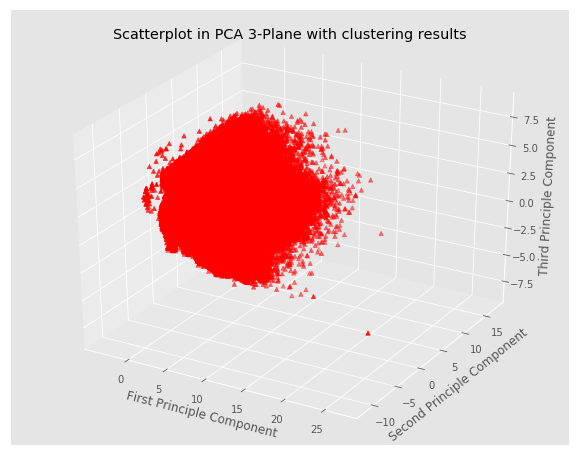

In [17]:
matplotlib_3D_X_reduced(re_X_3)

In [18]:
y5 = kmeans_cluster(re_X_3,5)

In [20]:
from sklearn.metrics import silhouette_score

In [21]:
silhouette_avg_5 = silhouette_score(re_X_3, y5,sample_size=25000,random_state=17)
silhouette_avg_5

0.4650642857665619

In [ ]:
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    y = kmeans_cluster(re_X_3,n_clusters)
    silhouette_avg = silhouette_score(re_X_3, y)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)